# <font color = 'red'> ЛР 7. Метод k-ближайших соседей. Знакомство с средой Google colab.</font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 11.11.2024

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

In [21]:
import numpy as np
import pandas as pd
import re
from scipy.stats import entropy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree as treeplt
from sklearn.datasets import make_classification, make_blobs, make_regression, load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from imblearn.under_sampling import RandomUnderSampler


RANDOM_STATE: int = 54

## <font color = 'green'> 1. Метод k-ближайших соседей.  </font>

Метод ближайщих соседей - один из самых интуитивно понятных но в тоже время эффективных методов класссификации.

Общая идея метода.

1. Предварительное обучение не требуется. Прогноз делается на основе известных данных.
2. Для тестового вектора признаков $\overline{x_{0}}$ находим ближайшие $k$ в пространстве признаков с помощью заданной метрики.
3. Классифицируем $\overline{x_{0}}$  по большинству меток представителей множества $k$ соседей из п 2. 

Подробнее [тут](https://habr.com/ru/articles/149693/) 


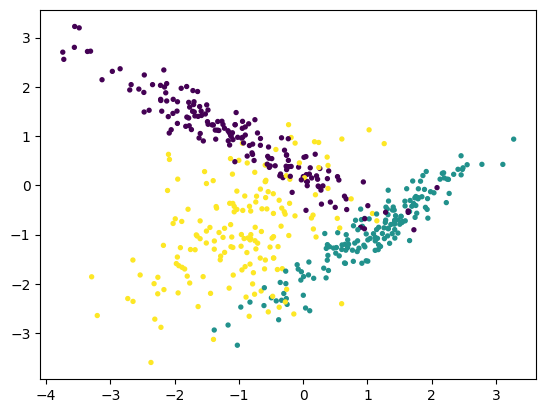

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *KNeighborsClassifier*.
4. Сравните работу полученных моеделей.
5. Изучите и эмпирически протестируйте гиперпараметры моделей для вашей и встроенной функции.
6. Можно ли переобучить классификатор k-ближайших соседей? Эмпирически подтвердите!

In [4]:
class CustomKNN:
    def __init__(self, k=3):
        """
        :param k: Количество ближайших соседей для классификации.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Запоминает обучающие данные.
        :param X: Обучающие признаки (numpy массив размером [n_samples, n_features]).
        :param y: Целевые метки (numpy массив размером [n_samples]).
        """
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        """
        Вычисляет Евклидово расстояние между двумя точками.
        :param x1: Первая точка.
        :param x2: Вторая точка.
        :return: Евклидово расстояние.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        """
        Предсказывает класс для каждой точки из набора X.
        :param X: Признаки тестового набора (numpy массив размером [n_samples, n_features]).
        :return: Предсказанные классы (numpy массив размером [n_samples]).
        """
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        """
        Предсказывает класс для одной точки x.
        :param x: Одна точка (numpy массив размером [n_features]).
        :return: Предсказанный класс.
        """
        # Вычисление расстояний до всех точек обучающего набора
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        # Получение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]

        # Извлечение меток классов этих соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Возвращаем самый распространенный класс среди соседей
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common


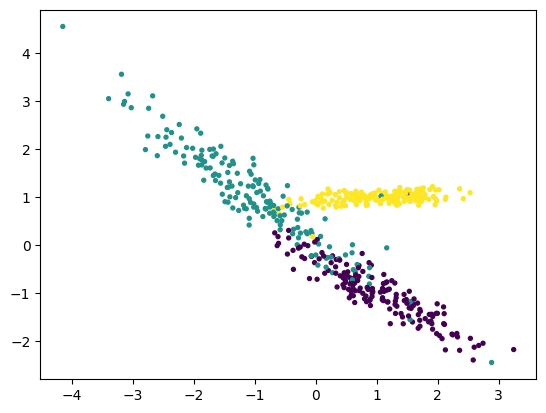

In [5]:
X,y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

R2 of our model on test: 0.8571428571428572


<Axes: >

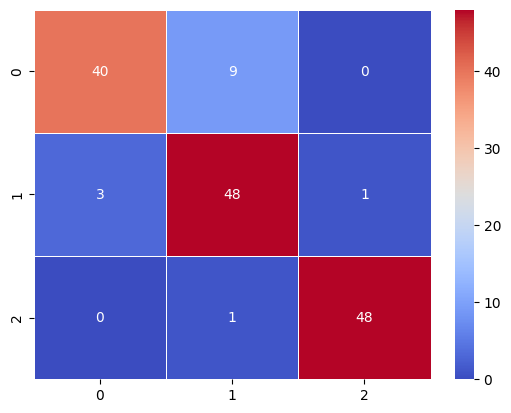

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

classifier = CustomKNN(k=3)
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

print(f"R2 of our model on test: {str(r2_score(ytest, ypred))}")

confusion = confusion_matrix(ytest,ypred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

R2 of build-in model on test: 0.8673469387755102


<Axes: >

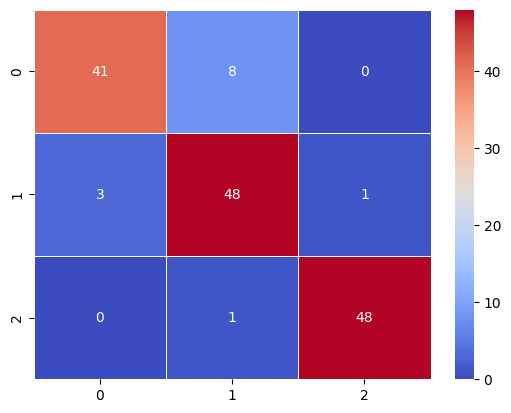

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(Xtrain, ytrain)

ypred = classifier.predict(Xtest)

print(f"R2 of build-in model on test: {str(r2_score(ytest, ypred))}")

confusion = confusion_matrix(ytest,ypred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

   k  Accuracy (Custom)  Accuracy (Sklearn)
0  1           0.880000            0.880000
1  2           0.880000            0.913333
2  3           0.906667            0.913333
3  4           0.906667            0.933333
4  5           0.920000            0.926667
5  6           0.906667            0.920000
6  7           0.913333            0.913333
7  8           0.913333            0.933333
8  9           0.926667            0.926667


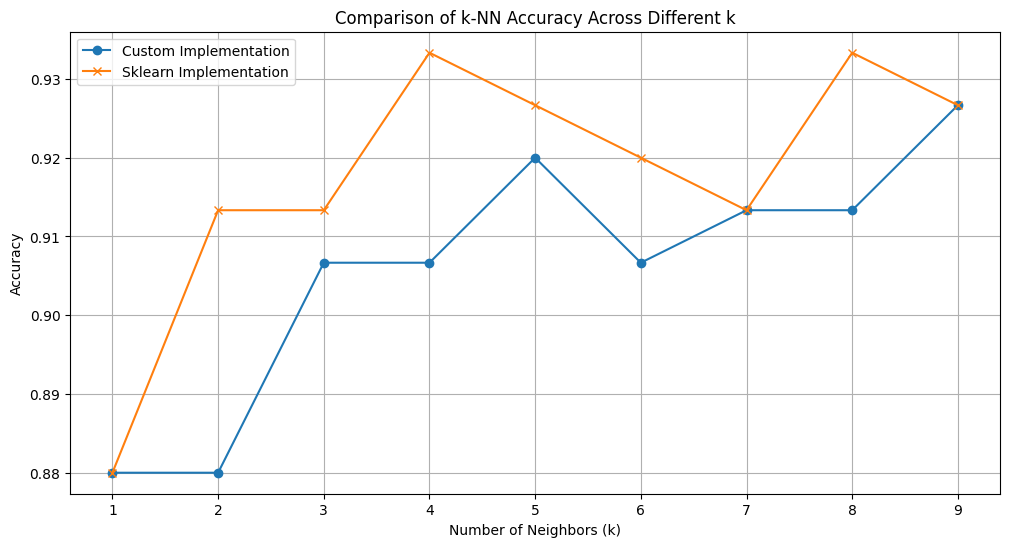

In [13]:
results = []
k=10

for k in range(1, k):
    # Наш слоняра
    knn_custom = CustomKNN(k=k)
    knn_custom.fit(Xtrain, ytrain)
    y_pred_custom = knn_custom.predict(Xtest)
    accuracy_custom = accuracy_score(ytest, y_pred_custom)
    
    # Встроенная модель
    knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
    knn_sklearn.fit(Xtrain, ytrain)
    y_pred_sklearn = knn_sklearn.predict(Xtest)
    accuracy_sklearn = accuracy_score(ytest, y_pred_sklearn)
    
    results.append({
        "k": k,
        "Accuracy (Custom)": accuracy_custom,
        "Accuracy (Sklearn)": accuracy_sklearn
    })

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(12, 6))
plt.plot(results_df["k"], results_df["Accuracy (Custom)"], label="Custom Implementation", marker="o")
plt.plot(results_df["k"], results_df["Accuracy (Sklearn)"], label="Sklearn Implementation", marker="x")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Comparison of k-NN Accuracy Across Different k")
plt.legend()
plt.grid()
plt.show()

Можно переобучить если k слишком маленький или слишком большой для нашего набора данных

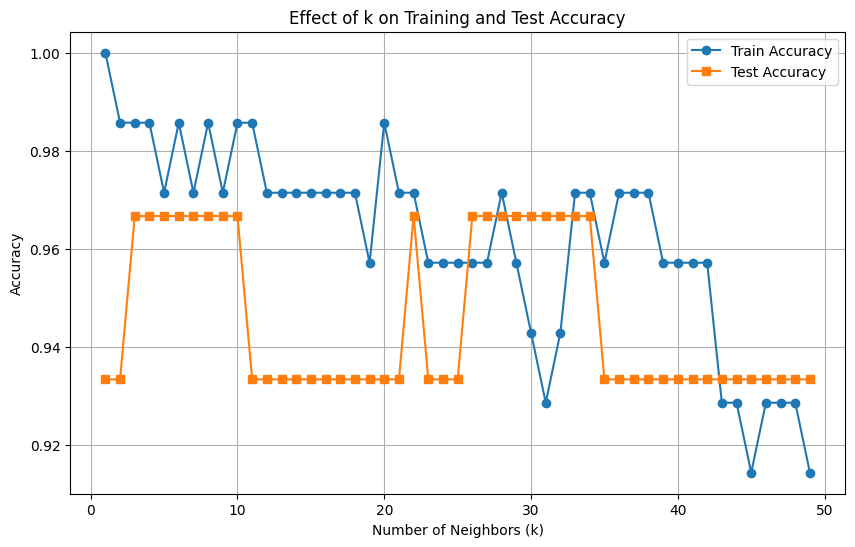

In [19]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

k_values = range(1, 50)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Effect of k on Training and Test Accuracy")
plt.legend()
plt.grid()
plt.show()

k маленький (тут 1).

Высокая точность на обучающей выборке (модель "запоминает" тренировочные данные).
Низкая точность на тестовой выборке из-за чувствительности к шуму.

k большой (тут после 40).

Тренировочная точность падает, так как модель теряет способность учитывать локальную структуру данных.
Тестовая точность тоже снижается из-за недообучения.

## <font color = 'green'> 2. Элементарная работа с изображениями  </font>

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

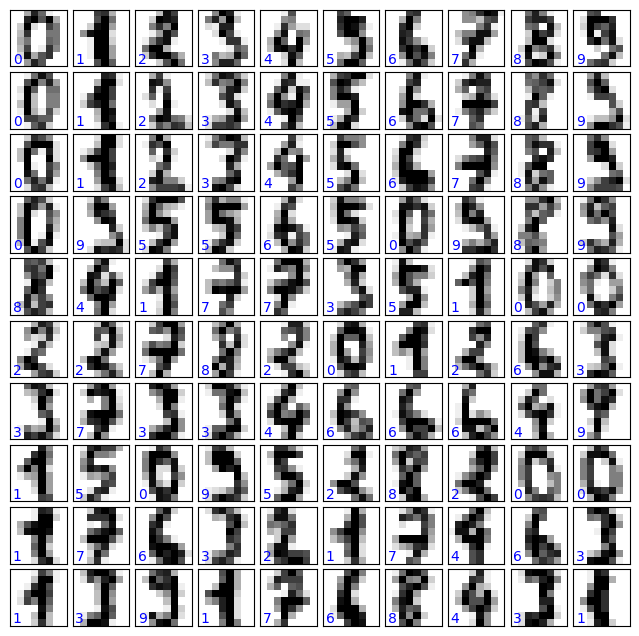

In [22]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [23]:
X = digits.data
X.shape

(1797, 64)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать изображения как векторы числовых признаков?
2. Реализуйте классификатор для определения цифры на изображении используя различные модели, изученные в ЛР4-ЛР6. 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

Да, изображения можно рассматривать как векторы числовых признаков, если представить их в виде одномерных массивов (векторов). В наборе данных digits каждое изображение размером 
8×8 пикселей, а каждый пиксель имеет значение интенсивности в градациях серого (от 0 до 16).

In [24]:
digits = load_digits()

X = digits.images.reshape(len(digits.images), -1) 
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [29]:
params = {
    "Decision_Tree": {'max_depth': range(1, 20), 'criterion': ['entropy', 'gini']},
    "KNN": {'n_neighbors': range(1, 32)},
    "Logistic_Regression": {'C': [0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', None]}
}

clf = {
    "Decision_Tree": GridSearchCV(DecisionTreeClassifier(), param_grid=params["Decision_Tree"], cv=10),
    "KNN": GridSearchCV(KNeighborsClassifier(), param_grid=params["KNN"], cv=10),
    "Logistic_Regression": GridSearchCV(LogisticRegression(penalty='l2', max_iter=10000), param_grid=params["Logistic_Regression"], cv=10)
}

for model_name in clf:
    print(f"Fitting {model_name}...")
    clf[model_name].fit(X_train, y_train)

models = {
    "Decision_Tree": DecisionTreeClassifier(
        criterion=clf["Decision_Tree"].best_params_['criterion'],
        max_depth=clf["Decision_Tree"].best_params_['max_depth'],
        random_state=RANDOM_STATE
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=clf["KNN"].best_params_['n_neighbors']
    ),
    "Logistic_Regression": LogisticRegression(
        max_iter=10000,
        penalty='l2',
        class_weight=clf["Logistic_Regression"].best_params_['class_weight'],
        C=clf["Logistic_Regression"].best_params_['C']
    )
}

Fitting Decision_Tree...
Fitting KNN...
Fitting Logistic_Regression...


In [30]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")

Training Decision_Tree...
Accuracy for Decision_Tree: 0.8574
Training KNN...
Accuracy for KNN: 0.9833
Training Logistic_Regression...
Accuracy for Logistic_Regression: 0.9722


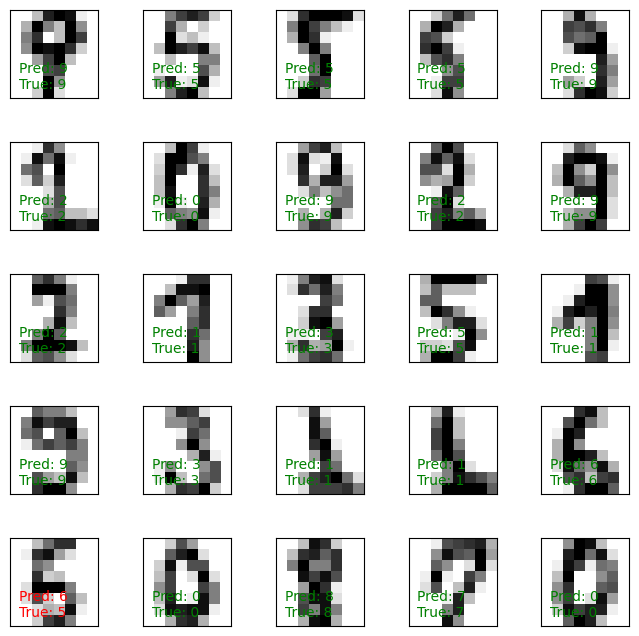

In [33]:
best_model = models["KNN"]
y_pred = best_model.predict(X_test)

fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.5))

for i, ax in enumerate(axes.flat[:25]):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary', interpolation='nearest')
    ax.text(0.1, 0.1, f"Pred: {y_pred[i]}\nTrue: {y_test[i]}", 
            transform=ax.transAxes, color='green' if y_pred[i] == y_test[i] else 'red')

plt.show()


## <font color = 'green'> 3. Работа с текстом.  </font>

Текстовые признаки также можно сводить к числовым. Для этого существует ряд подходов, которые изучаются подробно в отдельном разделе науки о данных. В прошлых ЛР вы уже изучили один из них TF-IDF -векторизацию. 

Подробнее [тут](https://yandex.ru/q/datascience/8268666625/).

In [5]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

test = X.toarray()
test

array([[0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
        0.        , 0.        , 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.35829137, 0.        ],
       [0.40619178, 0.31544415, 0.        , 0.        , 0.53409337,
        0.53409337, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40619178, 0.        ],
       [0.32412354, 0.25171084, 0.        , 0.        , 0.        ,
        0.        , 0.4261835 , 0.        , 0.4261835 , 0.4261835 ,
        0.32412354, 0.        , 0.4261835 ]])

In [8]:
vectorizer.vocabulary_

{'it': 3,
 'is': 2,
 'going': 1,
 'to': 10,
 'rain': 7,
 'today': 11,
 'am': 0,
 'not': 4,
 'outside': 5,
 'watch': 12,
 'the': 9,
 'season': 8,
 'premiere': 6}

<font color = 'red' size = 5>Задание 3 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать тексты как векторы числовых признаков?
2. Реализуйте классификатор (на основе любой изученной вами модели) для определения эмоционального оттенка отзывов к фильмам. 
   Для преобразования текста используйте векторизацию TF-IDF. Предварительно минимально обработайте текст (стоп-слова, леммантизатор, посторонние символы) 
3. Попытайтесь найти оптимальную модель прогноза на основе KNN метода. Как влияет количество признаков на работоспособность модели?
4. Попытайтесь оптимизировать количество фич в тексте используя другой векторизатор.*

**Учитывайте, что векторизатор значительно увеличивает количество фич! Будьте внимательны со скоростью и производительностью!**

[Датасет](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [25]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
def preprocess_text(text):
    text = text.lower()                  # Приведение к нижнему регистру
    text = re.sub(r'<[^>]+>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'\W', ' ', text)      # Удаление символов
    text = re.sub(r'\s+', ' ', text)     # Удаление лишних пробелов
    return text.strip()

data['prep_review'] = data['review'].apply(preprocess_text)

data.head()

,review,sentiment,prep_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


In [35]:
X_text = data['prep_review'] 
Y = data['sentiment'].map({'positive': 1, 'negative': 0})  

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

In [28]:
res = pd.DataFrame(data['review'])
res['sentiment'] = Y.values
res['tfidf_features'] = [X.getrow(i) for i in range(X.shape[0])]    # как разряженную матрицу

Accuracy: 0.8945


<Axes: >

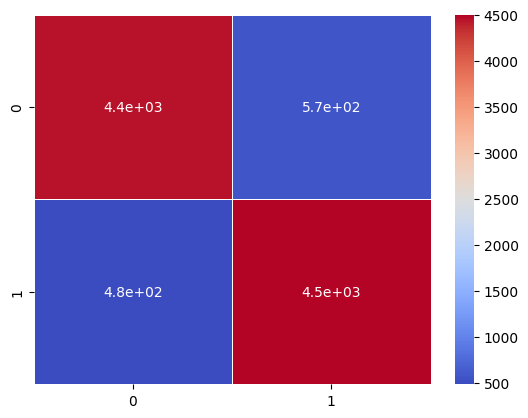

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

Accuracy: 0.7904


<Axes: >

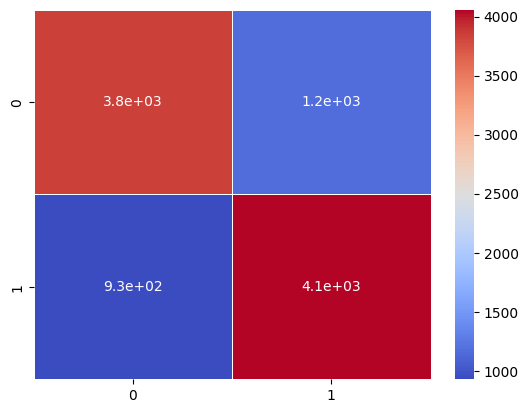

In [41]:
knn = KNeighborsClassifier(n_neighbors=20)

X_text = data['prep_review'] 
Y = data['sentiment'].map({'positive': 1, 'negative': 0}) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE) 

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

In [9]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучший параметр n_neighbors:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучший параметр n_neighbors: {'n_neighbors': 20}
Лучшая точность: 0.7586499999999999


CountVectorizer Accuracy: 0.659


<Axes: >

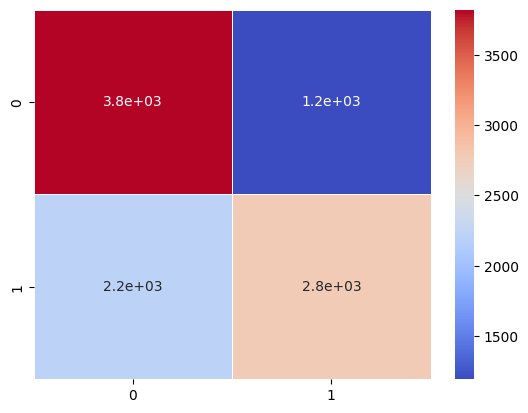

In [39]:
# CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_text = data['prep_review'] 
Y = data['sentiment'].map({'positive': 1, 'negative': 0})  

X_count = count_vectorizer.fit_transform(X_text)
X_train, X_test, y_train, y_test = train_test_split(X_count, Y, test_size=0.2, random_state=RANDOM_STATE)

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("CountVectorizer Accuracy:", accuracy_score(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

HashingVectorizer Accuracy: 0.7635


<Axes: >

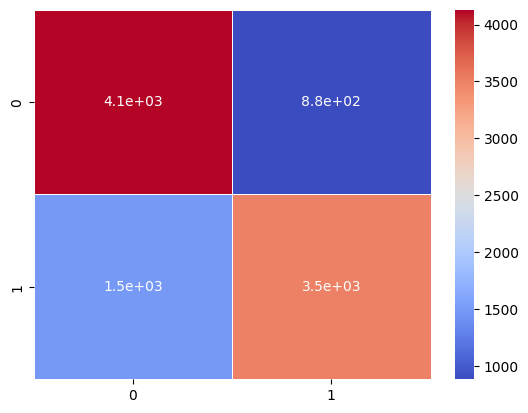

In [40]:
# HashingVectorizer
hashing_vectorizer = HashingVectorizer(stop_words='english')
X_text = data['prep_review'] 
Y = data['sentiment'].map({'positive': 1, 'negative': 0})  

X_hash = hashing_vectorizer.fit_transform(X_text)
X_train, X_test, y_train, y_test = train_test_split(X_hash, Y, test_size=0.2, random_state=RANDOM_STATE)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("HashingVectorizer Accuracy:", accuracy_score(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

## <font color = 'green'> 4. Знакомство с Google Colab  </font>

<font color = 'red' size = 5>Задание 4 </font>


Для работы с данным заданием использовать Google Colab.

1. Проведите предварительную обработку данных. Автоматически загрузите их в Google colab.
2. Постройте модели классификации на основе различных методов, изученных вами из встроееной библиотеки. 
3. Подберите оптимальные гиперпараметры моделей используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!

[Датасет](https://www.kaggle.com/c/titanic/data?select=test.csv)

[Colab](https://adriandolinay.medium.com/an-introduction-to-google-colab-2023-6c26792827b3)






In [1]:
! pip install numpy

https://colab.research.google.com/drive/1LvRyZHkoxKNzfZGYejDAbnTzLo7fjzOT#scrollTo=5gBH0gWOnMQU